# Introduction To Function Calling!


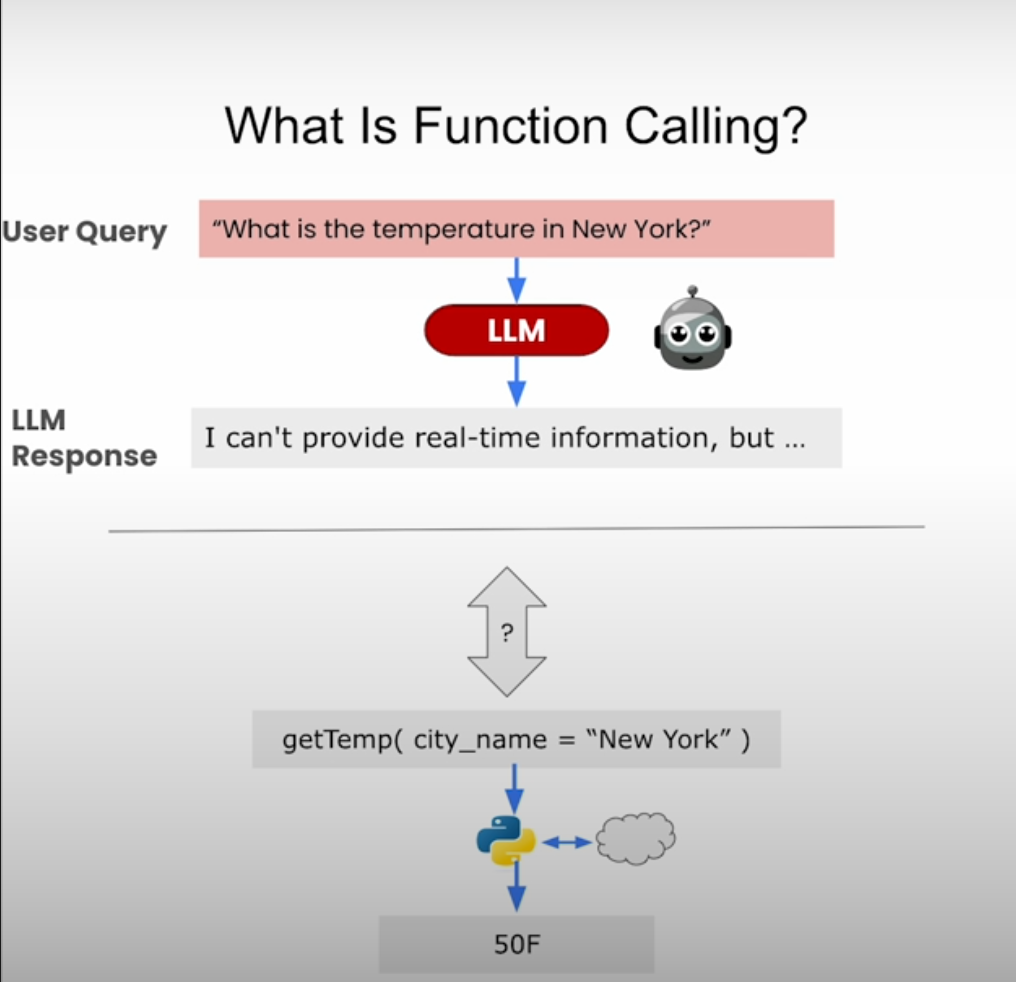

Function-calling is the capability of an LLM to take in a natural language query, along with a description of the function,and output a string that can be used to call that function.

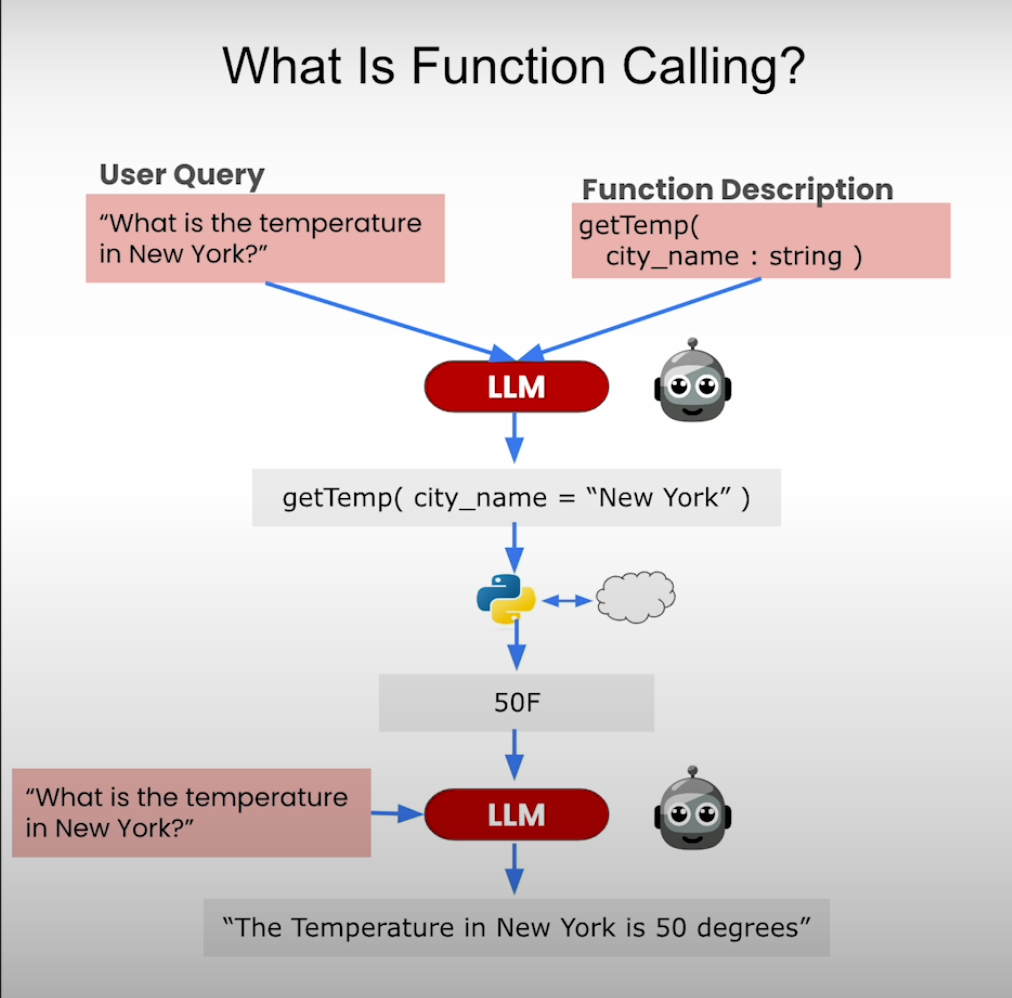

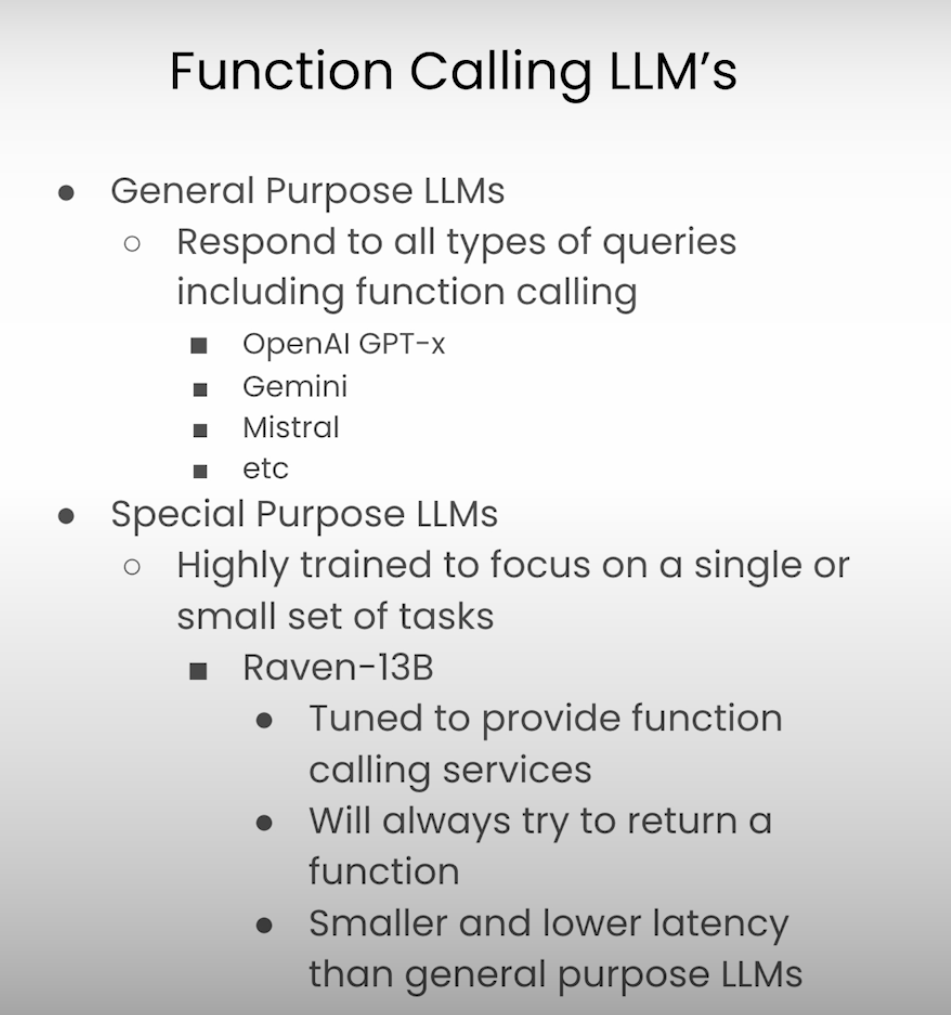

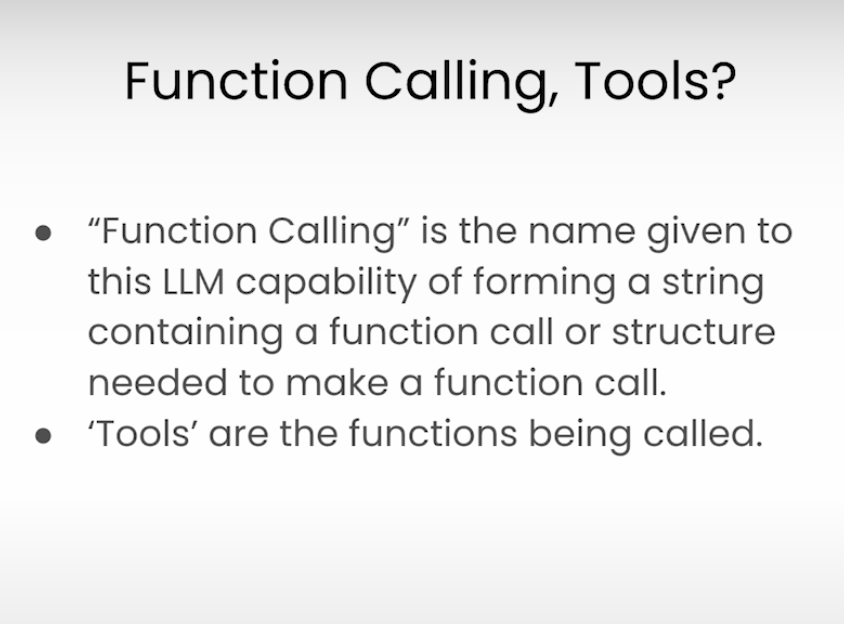

### Writing A Local Python Tool (写一个本地的python tool)

In [1]:
from matplotlib import pyplot as plt

def plot_some_points(x : list, y : list):
  """
  Plots some points!
  """
  plt.plot(x, y)
  plt.show()

In [2]:
USER_QUERY = "Hey can you plot y=10x where x=1, 2, 3 for me?"

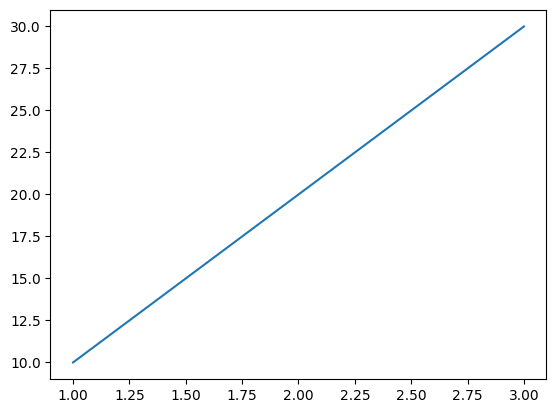

In [3]:

plot_some_points(x=[1, 2, 3], y=[10, 20, 30])

想让大模型帮我们做上面的事，首先要给出一个tool 描述（description）和user query 给LLM。
- 你首先要提供前面使用的函数的原型。
- 你将要使用的LLM使用python格式的函数。
- 你还将添加一些关于工具功能的描述。LLM会根据描述来判断是否应该使用该工具来回答用户查询的推理。
- 你还需要提供LLM 用户的输入（user query）

In [5]:
prompt = \
f'''
Function:
def plot_some_points(x : list, y : list):
  """
  Plots some points!
  """
  plt.plot(x, y)
  plt.show()

User Query: {USER_QUERY}<human_end>
'''

In [9]:
# 这个大模型是训练过的，专门针对function-calling ，这里是接口调用，返回function-calling字符串
# def raven_post(payload):
#     """
#     Sends a payload to a TGI endpoint.
#     """
#     # Now, let's prompt Raven!
#     API_URL = "http://nexusraven.nexusflow.ai"
#     headers = {
#             "Content-Type": "application/json"
#     }
#     import requests
#     response = requests.post(API_URL, headers=headers, json=payload)
#     return response.json()

# def query_raven(prompt):
# 	"""
# 	This function sends a request to the TGI endpoint to get Raven's function call.
# 	This will not generate Raven's justification and reasoning for the call, to save on latency.
# 	"""
# 	import requests
# 	output = raven_post({
# 		"inputs": prompt,
# 		"parameters" : {"temperature" : 0.001, "stop" : ["<bot_end>"], "return_full_text" : False, "do_sample" : False, "max_new_tokens" : 2048}})
# 	call = output[0]["generated_text"].replace("Call:", "").strip()
# 	return call

In [6]:
from utils import query_raven
function_call = query_raven(prompt)

LLM function-calling 的结果是一个字符串： 函数名被调用的状态，并包含输入参数，然后exec 执行一下就会执行这个函数（tool）

In [7]:
print (function_call)

plot_some_points(x=[1, 2, 3], y=[10, 20, 30])


exec 执行储存在字符串或文件中的 Python 语句，相比于 eval，exec 可以执行更复杂的 Python 代码。https://www.runoob.com/python3/python3-func-exec.html  


exec 的语法: exec(object[, globals[, locals]])
- object：必选参数，表示需要被指定的 Python 代码。它必须是字符串或 code 对象。如果 object 是一个字符串，该字符串会先被解析为一组 Python 语句，然后再执行（除非发生语法错误）。如果 object 是一个 code 对象，那么它只是被简单的执行。  
- globals：可选参数，表示全局命名空间（存放全局变量），如果被提供，则必须是一个字典对象。  
- locals：可选参数，表示当前局部命名空间（存放局部变量），如果被提供，可以是任何映射对象。如果该参数被忽略，那么它将会取与 globals 相同的值。  

exec 返回值永远为 None。

```
>>>exec('print("Hello World")')
Hello World
# 单行语句字符串
>>> exec("print ('runoob.com')")
runoob.com
 
#  多行语句字符串
>>> exec ("""for i in range(5):
...     print ("iter time: %d" % i)
... """)
iter time: 0
iter time: 1
iter time: 2
iter time: 3
iter time: 4
```

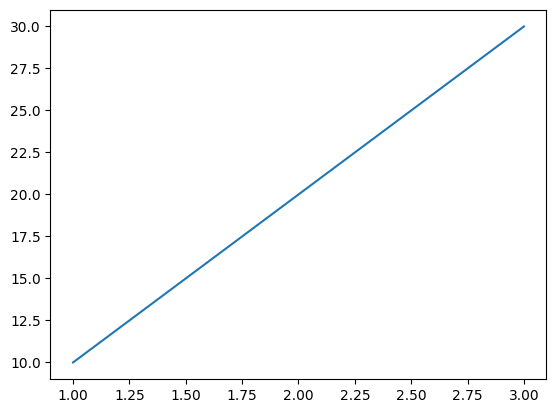

In [8]:
exec(function_call)

#### Try Your Own!

In [19]:
USER_QUERY = "帮我画个y=x**3, 其中 x = 1,2,3, 4, 5"

In [20]:
prompt = \
f'''
Function:
def plot_some_points(x : list, y : list):
  """
  Plots some points!
  """
  plt.plot(x, y)
  plt.show()

User Query: {USER_QUERY}<human_end>
'''
from utils import query_raven
function_call = query_raven(prompt)

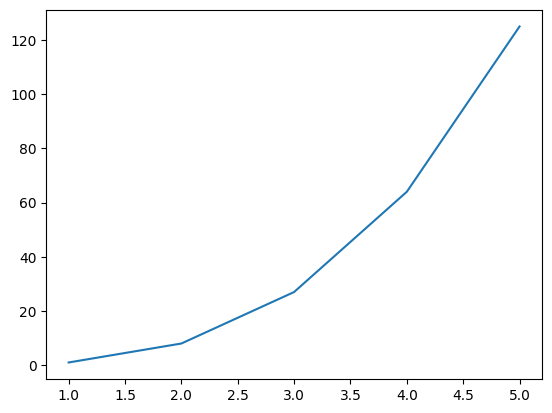

In [21]:
exec(function_call)

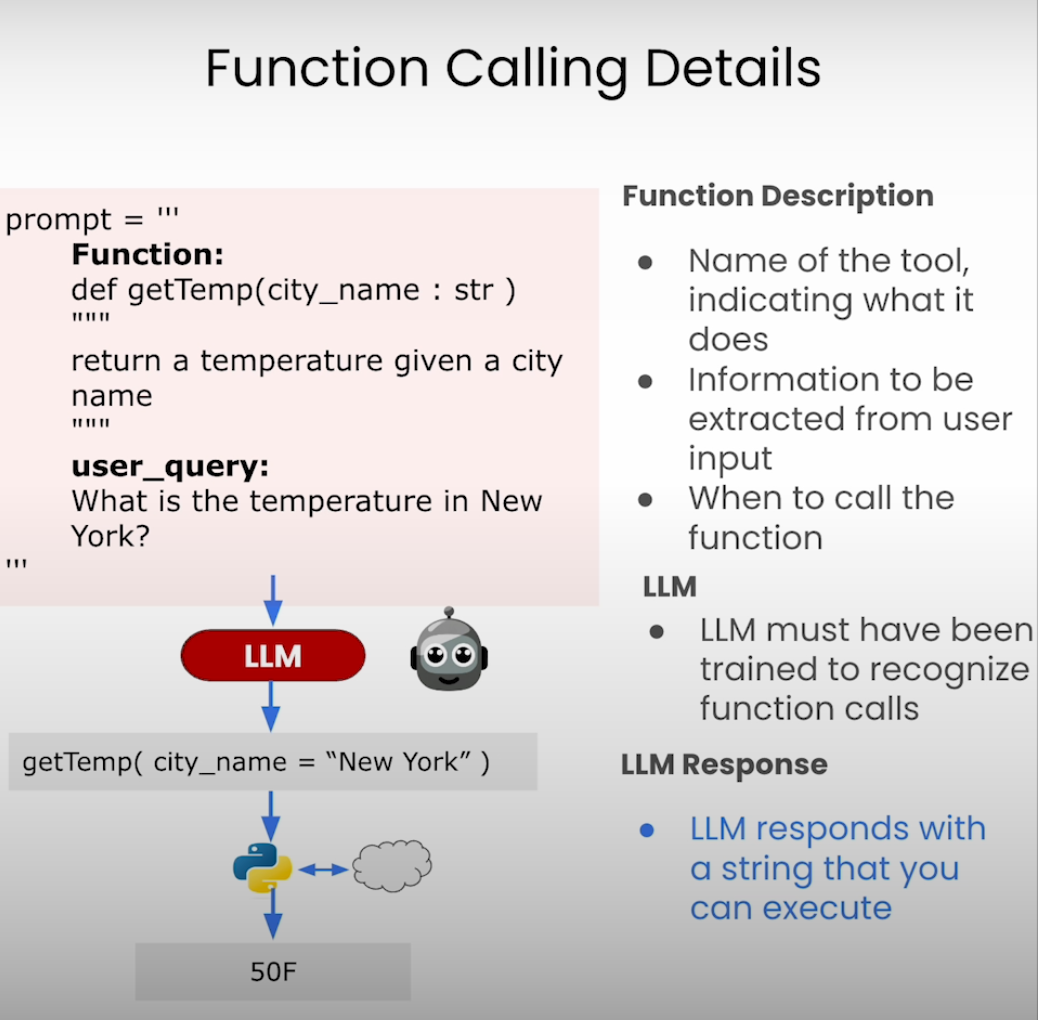

### Let's Try Another Example! 试一个复杂的例子

#### Let's define a function

In [23]:
#  提供 脸的颜色， 眼睛的颜色， 鼻子的颜色 画一个笑脸
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_clown_face(face_color='yellow', eye_color='black', 
                    nose_color='red'):
    """
    Draws a customizable, simplified clown face using matplotlib.

    Parameters:
    - face_color (str): Color of the clown's face. Default is 'yellow'.
    - eye_color (str): Color of the clown's eyes. Default is 'black'.
    - nose_color (str): Color of the clown's nose. Default is 'red'.

    This function creates a plot displaying a simplified clown face, where essential facial features' size, position, and color can be customized. 
    """
    # Constants
    face_radius = 0.4
    nose_radius = 0.1
    nose_x, nose_y = 0.5, 0.5
    mouth_x, mouth_y = 0.5, 0.3
    mouth_color = 'black'
    eye_size = 0.05
    mouth_size = (0.3, 0.1)
    eye_offset=(0.15, 0.15)
    mouth_theta = (200, 340)

    fig, ax = plt.subplots()
    # Face
    face = patches.Circle((0.5, 0.5), face_radius, color=face_color, fill=True)
    ax.add_patch(face)
    # Eyes
    eye_left = patches.Circle((0.5-eye_offset[0], 0.5+eye_offset[1]), eye_size, color=eye_color, fill=True)
    eye_right = patches.Circle((0.5+eye_offset[0], 0.5+eye_offset[1]), eye_size, color=eye_color, fill=True)
    ax.add_patch(eye_left)
    ax.add_patch(eye_right)
    # Nose
    nose = patches.Circle((nose_x, nose_y), nose_radius, color=nose_color, fill=True)
    ax.add_patch(nose)
    # Mouth
    mouth = patches.Arc((mouth_x, mouth_y), mouth_size[0], mouth_size[1], angle=0, 
                        theta1=mouth_theta[0], theta2=mouth_theta[1], color=mouth_color, linewidth=2)
    ax.add_patch(mouth)
    # Setting aspect ratio to 'equal' to ensure the face is circular
    ax.set_aspect('equal')
    # Remove axes
    ax.axis('off')
    plt.show()

#### Let's Define A Prompt

In [28]:
USER_QUERY = \
"画一个白色的小丑脸和红色的鼻子吗" 

raven_prompt = \
'''
Function:
def draw_clown_face(face_color='yellow', 
                    eye_color='black',
                    nose_color='red'):
    """
    Draws a customizable, simplified clown face using matplotlib.

    Parameters:
    - face_color (str): Color of the clown's face.
    - eye_color (str): Color of the clown's eyes.
    - nose_color (str): Color of the clown's nose.
    """

User Query: {query}<human_end>
'''
raven_prompt_with_query = raven_prompt.format(query=USER_QUERY)


In [29]:
print (raven_prompt_with_query)


Function:
def draw_clown_face(face_color='yellow', 
                    eye_color='black',
                    nose_color='red'):
    """
    Draws a customizable, simplified clown face using matplotlib.

    Parameters:
    - face_color (str): Color of the clown's face.
    - eye_color (str): Color of the clown's eyes.
    - nose_color (str): Color of the clown's nose.
    """

User Query: 画一个白色的小丑脸和红色的鼻子吗<human_end>



In [30]:
from utils import query_raven
raven_call = query_raven(raven_prompt_with_query)
print (raven_call)

draw_clown_face(face_color='white', nose_color='red')


#### Let's Run The Call

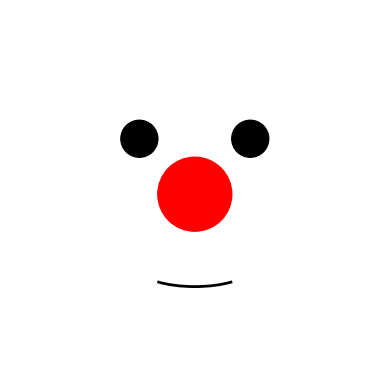

In [31]:
exec(raven_call)

#### Make Your Own Clown!


draw_clown_face(face_color='black', eye_color='white', nose_color='red')


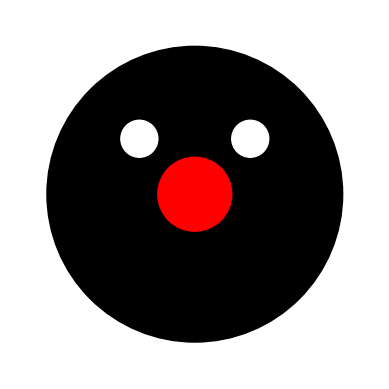

In [34]:
USER_QUERY = "画一个小丑的笑脸，眼睛是白色的，脸是黑色的，嘴巴是粉色的，鼻子是大红色，耳朵就跟米老鼠一样的"
raven_prompt_with_query = raven_prompt.format(query=USER_QUERY)

from utils import query_raven
raven_call = query_raven(raven_prompt_with_query)
print (raven_call)
exec(raven_call)

#### Using OpenAI FC 
#### 试一下 chatgpt的function-calling

In [35]:
import json
from openai import OpenAI
from dotenv import load_dotenv
import os

_ = load_dotenv()

def query_openai(msg, functions=None):
  load_dotenv()
  GPT_MODEL = "gpt-3.5-turbo"

  openai_client = OpenAI(api_key=os.environ["OPENAI_API_KEY"])
  openai_response = openai_client.chat.completions.create(
    model = GPT_MODEL,
    messages = [{'role': 'user', 'content': msg}],
    tools = functions)
  return openai_response

需要以json格式提供tool的描述（description）和参数(arguments)

In [39]:
openai_function = {
  "type": "function",
  "function": {
    "name": "draw_clown_face",
    "description": "Draws a customizable, simplified clown face using matplotlib.",
    "parameters": {
      "type": "object",
      "properties": {
        "face_color": {
          "type": "string",
          "description": "Color of the clown's face."
        },
        "eye_color": {
          "type": "string",
          "description": "Color of the clown's eyes."
        },
        "nose_color": {
          "type": "string",
          "description": "Color of the clown's nose."
        }
        }
      }
    }
  }

openai_msg = \
"Hey can you draw a pink clown face with a red nose"

In [40]:
result = query_openai(openai_msg, functions=[openai_function])


In [41]:
print (result.choices[0].message.tool_calls[0].function)

Function(arguments='{"face_color": "pink", "eye_color": "black", "nose_color": "red"}', name='draw_clown_face')


### 注意！返回的结果跟之前不一样，这样的字符串是不能直接用exec执行的，所以需要一个归一化处理

In [42]:
tool_name = result.choices[0].message.tool_calls[0].function.name
tool_args = result.choices[0].message.tool_calls[0].function.arguments


In [43]:
function_call = f"{tool_name}(**{tool_args})"


In [44]:
print (function_call)

draw_clown_face(**{"face_color": "pink", "eye_color": "black", "nose_color": "red"})


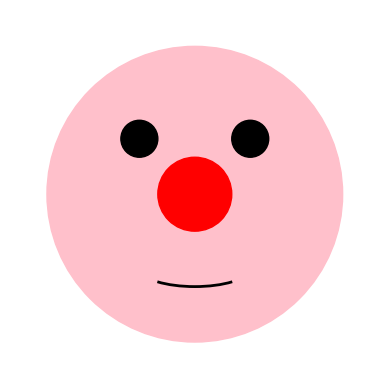

In [45]:
exec(function_call)

### 使用训练过的LLM在非结构化数据和高度结构化的code之间搭建了桥梁！！

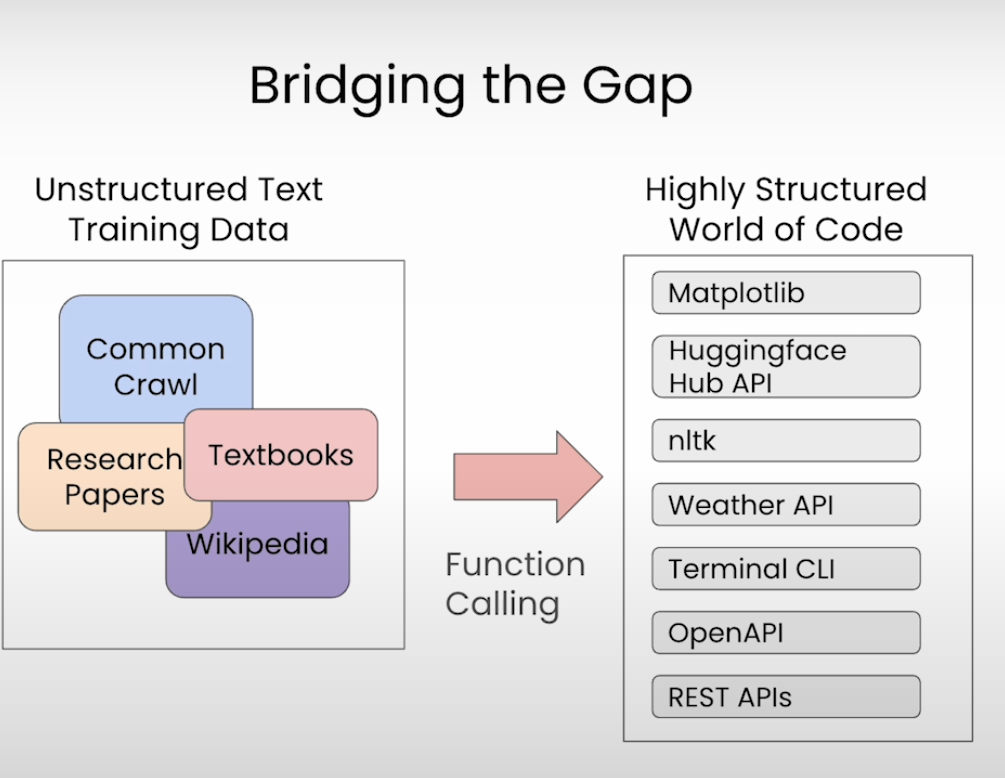